In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: >

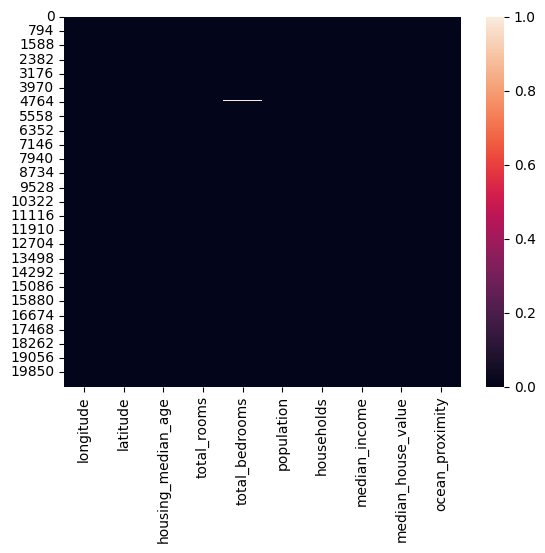

In [3]:
sns.heatmap(df.isnull())

<Axes: >

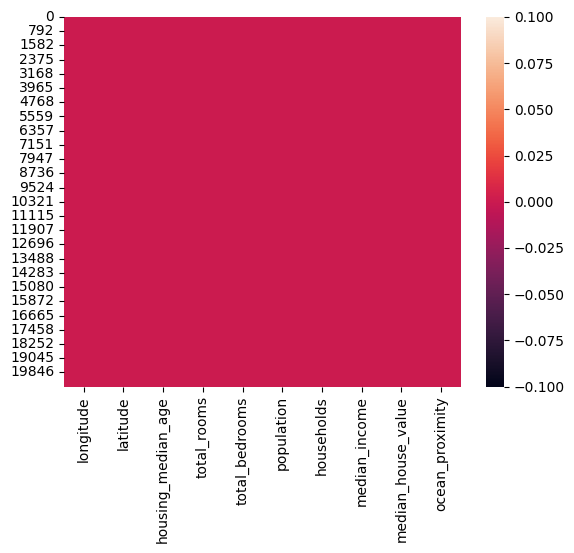

In [4]:
df.dropna(inplace=True)
sns.heatmap(df.isnull())

## Split data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

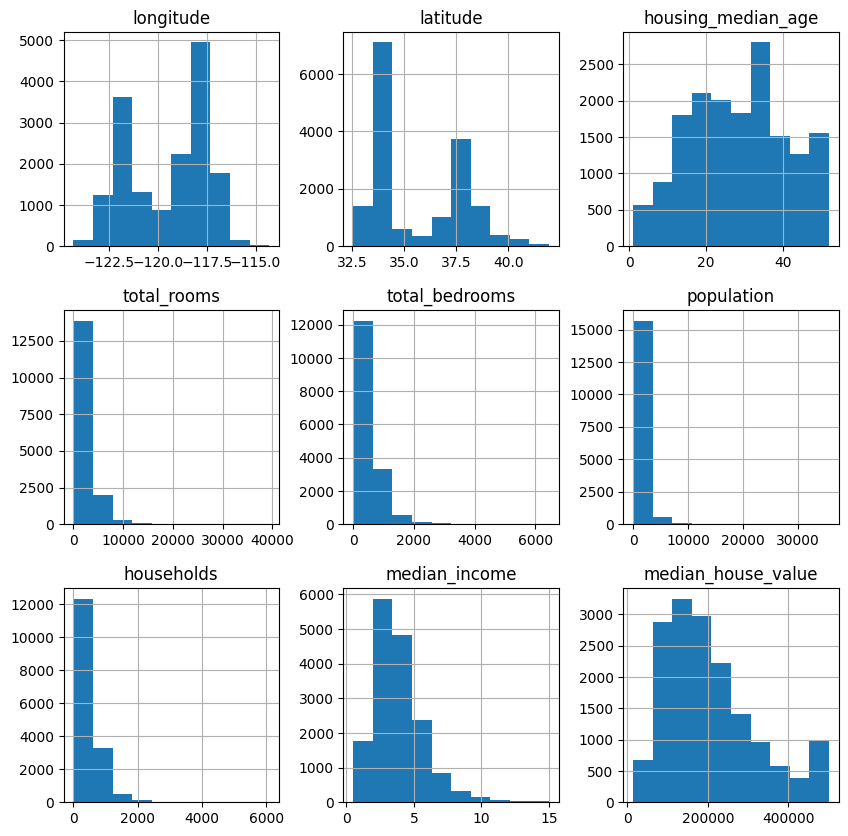

In [6]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(10,10))

## Data correlation

<Axes: >

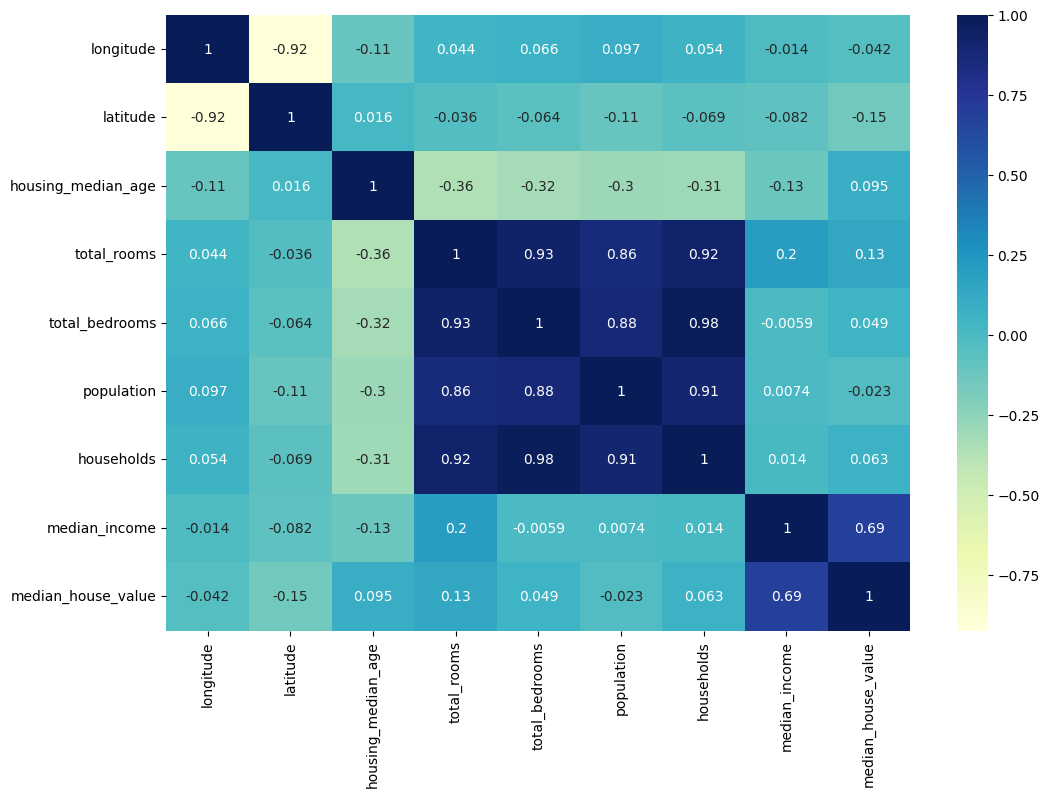

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [8]:
train_data.total_rooms = np.log(train_data.total_rooms + 1)
train_data.total_bedrooms = np.log(train_data.total_bedrooms + 1)
train_data.population = np.log(train_data.population + 1)
train_data.households = np.log(train_data.households + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

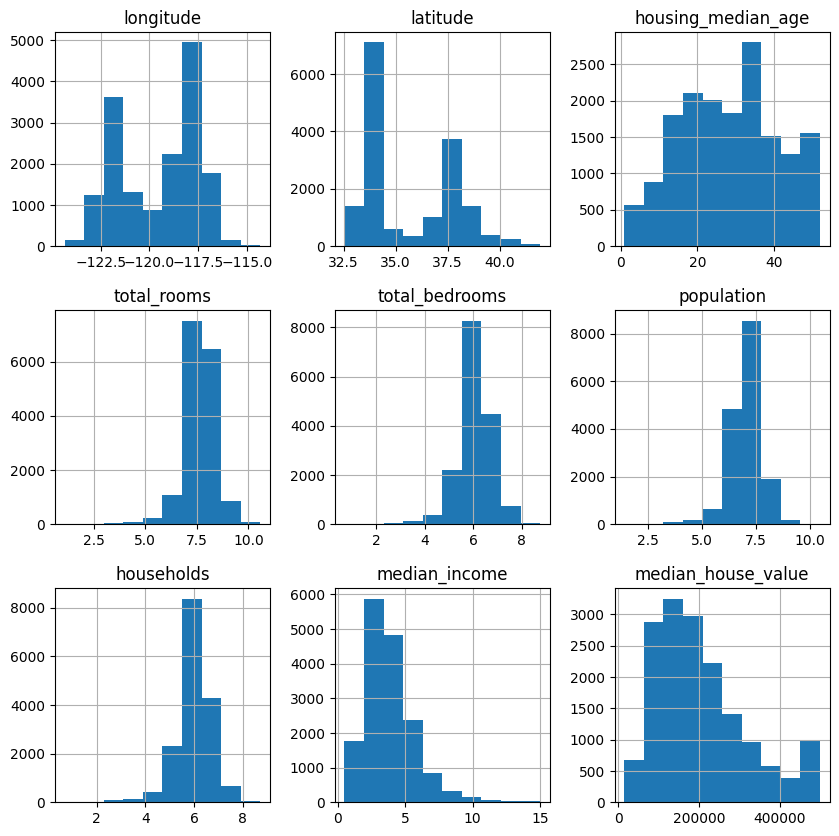

In [9]:
train_data.hist(figsize=(10,10))

In [10]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6691,-118.08,34.13,46.0,7.122060,4.997212,5.934894,4.983607,8.4546,500001.0,False,True,False,False,False
822,-122.06,37.63,23.0,7.570443,5.877736,6.735780,5.899897,3.3611,169200.0,False,False,False,True,False
20509,-121.53,38.60,25.0,8.547722,7.008505,8.069968,6.979145,2.7566,80200.0,False,True,False,False,False
10085,-117.95,33.94,28.0,7.955776,6.208590,7.160846,6.208590,5.0782,264100.0,True,False,False,False,False
19004,-121.96,38.32,12.0,8.542471,6.906755,7.919356,6.884487,4.0458,130600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,-121.83,37.26,7.0,8.191463,6.622736,7.461640,6.526495,4.5033,213100.0,True,False,False,False,False
7100,-117.99,33.90,33.0,7.678789,5.950643,7.119636,5.950643,5.6454,202800.0,True,False,False,False,False
16790,-122.46,37.65,21.0,7.920083,6.220590,7.614805,6.198479,5.2573,322900.0,False,False,False,False,True
14795,-117.11,32.58,21.0,7.970740,6.530878,7.654443,6.569481,2.2755,125000.0,False,False,False,False,True


<Axes: >

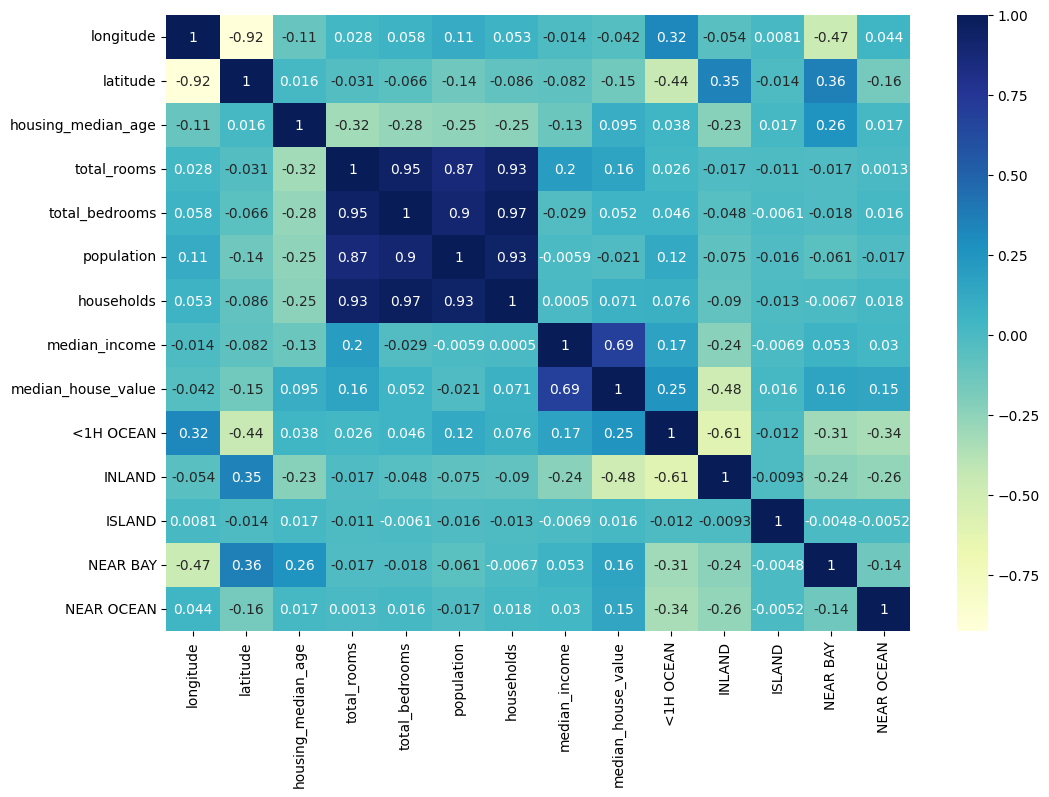

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

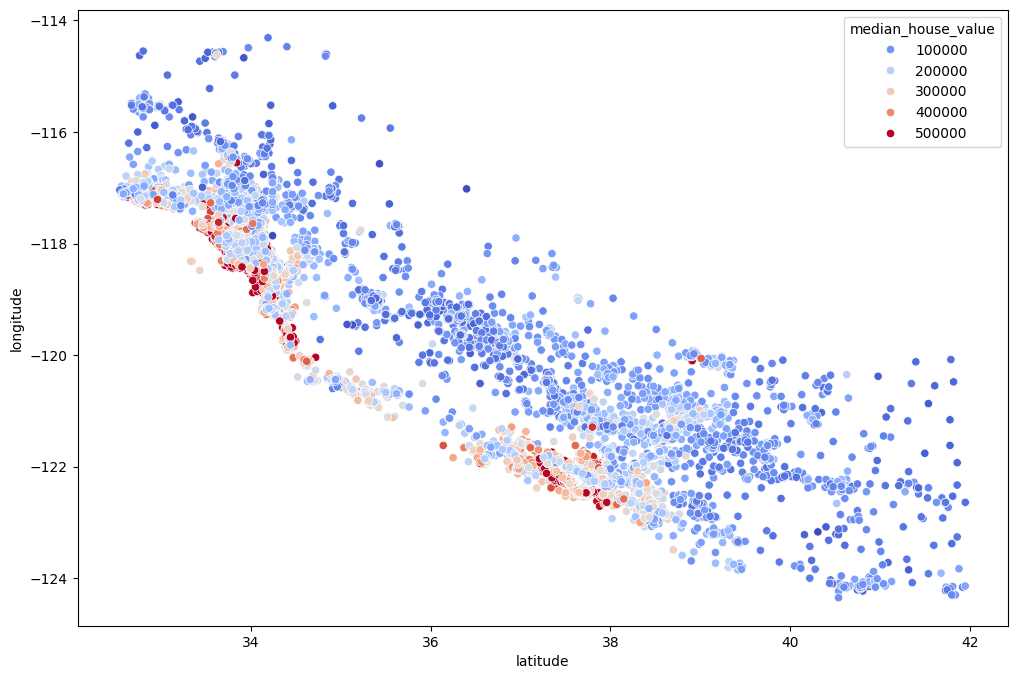

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

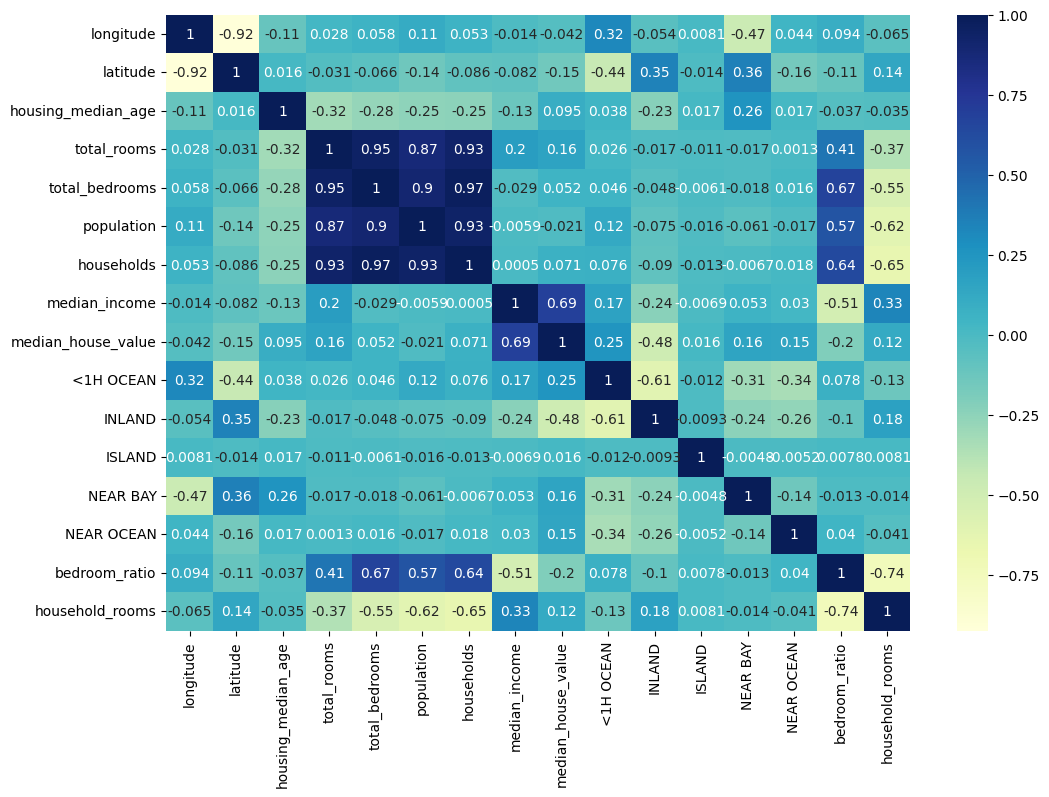

In [13]:
train_data['bedroom_ratio'] = train_data.total_bedrooms / train_data.total_rooms
train_data['household_rooms'] = train_data.total_rooms / train_data.households
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [14]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
test_data = X_test.join(y_test)

test_data.total_rooms = np.log(test_data.total_rooms + 1)
test_data.total_bedrooms = np.log(test_data.total_bedrooms + 1)
test_data.population = np.log(test_data.population + 1)
test_data.households = np.log(test_data.households + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data.total_bedrooms / test_data.total_rooms
test_data['household_rooms'] = test_data.total_rooms / test_data.households

In [16]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [17]:
reg.score(X_test, y_test)

0.6733602744876197

In [18]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_test, y_test)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
forest.score(X_test, y_test)

0.9678264012184712